# Exploratory data analysis (EDA)

EDA is a key step in the **Data Preparation** phase of [CRISP-DM](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining).  Approaching EDA systematically is important to ensure that you don't forget any steps and avoid making errors which could compromise your analysis/modeling later.  Before starting EDA, you should have defined the business question and understand what data sources are available.  During EDA, you want to refine your intuition about the data and develop hypotheses which we could model or test later.

Note how at each step, I keep checking that everything worked as expected.

We will perform the following steps:

*  Load data
*  Sanity check data
*  Summary statistics
*  Plots
*  Identify and examine problem data
   *  Outliers
   *  Missing data
*  Clean data
*  First crappy model

After EDA, it is time to peform cleaning for more intensive modeling, engineer features, and refine the model.

### References

To learn more about EDA:
*  John Tukey's [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160/ref=sr_1_1?ie=UTF8&qid=1455242410&sr=8-1&keywords=tukey+exploratory+data+analysis)
*  Ben Hamner's [Python Data Visualizations](https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations) on Kaggle
*  Appendix A in [Fundamentals of Machine Learning for Predictive Data Analytics](http://machinelearningbook.com)

## 1. Business Question

In this case, we have a research question, not a business question.  We want to use data on irises to determine the species of a flower.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Data Understanding

The second step in CRISP-DM is understanding what data is available.  We are fortunate to have access to R.A. Fisher's famous iris dataset.

## 3. Data Preparation

Now we load and prepare the data for modeling.  This consists of:

* Loading the data
* Data hygiene/cleaning
* EDA
* Feature engineering (building features for modeling)

### Load data

Everything starts with loading data.

In [3]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

### Sanity checking

After loading the data, you need to check that the data loaded correctly.  If you are working with a large dataset, create a subset so that you can quickly get everything working.  Later, rerun with the full data or larger subsamples.  Make sure that the subsamples are representative by trying multiple subsamples.

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Check that data types are correct and if there any data is missing:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Convert the `species` to a categorical variable: 

In [8]:
df.species = df.species.astype('category')

Check conversion was successful:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


Great!  Everything is now the correct data type.  And, we are fortunate not to have any **missing values**.

I like to tabulate (1-way and 2-way) categorical variables:

In [7]:
df.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

Looks like the data is ready for the next step: summary statistics.  Note:  there is no class imbalance.  If there were, we would have to think about up/down sampling or weighting.

### Summary statistics

Next, I look at summary statistics. I want to understand the nature of the variation and whether there are any problems, such as outliers or missing values. You may decide to plot at this stage as well -- histograms and box plots are particularly useful.  You may also decide to compute statistics for subsets of the data based on some categorical field.

#### Continuous variables

Look at standard moments to understand *central tendency* and *variation* in data and to identify potential outliers:

*  min
*  q25: 25-th percentile
*  median
*  q75: 75-th percentile
*  mean
*  max
*  standard deviation
*  iqr: interquartile range (optional)

#### Discrete (categorical) variables

Check frequency counts and proportions via histograms.  Cross-tabulation is often helpful.

Let's start with the classic statistics:

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


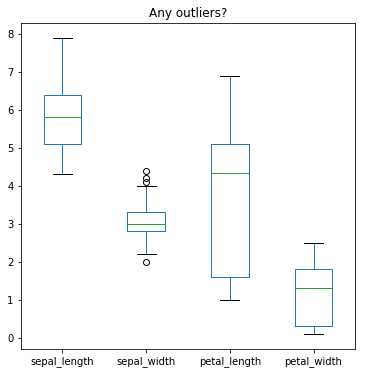

In [13]:
df.plot(kind='box', 
        figsize=(6,6), 
        title='Any outliers?')
plt.show()

If the data is very *skewed* or has *kurtosis*, you might want to check other percentiles or statistics.  Or, check for departures from normality.  Big data, such as Amazon data, often has a long tail, so you may need to transform data during feature engineering, such as by taking `log`s of fields.

Check that statistics look different for each species so that we have a chance of predicting species:

In [10]:
df.groupby('species').describe().T

species             Iris-setosa  Iris-versicolor  Iris-virginica
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000

## Plots

Summary statistics can be misleading, as Anscomb showed with his [Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).  Consequently, you should always plot (a subset) of your data to develop intuition and hypotheses about the data.

### Common plots à la Tukey

There a many different types of plots, but the standard ones to consider are:

*  scatter (matrix) plot
*  bar plot
*  histogram
*  box plot

I like to start by plotting the features against each other to better understand the variation in the data.  If you have a lot of features, you will need to chose the sensible subset.

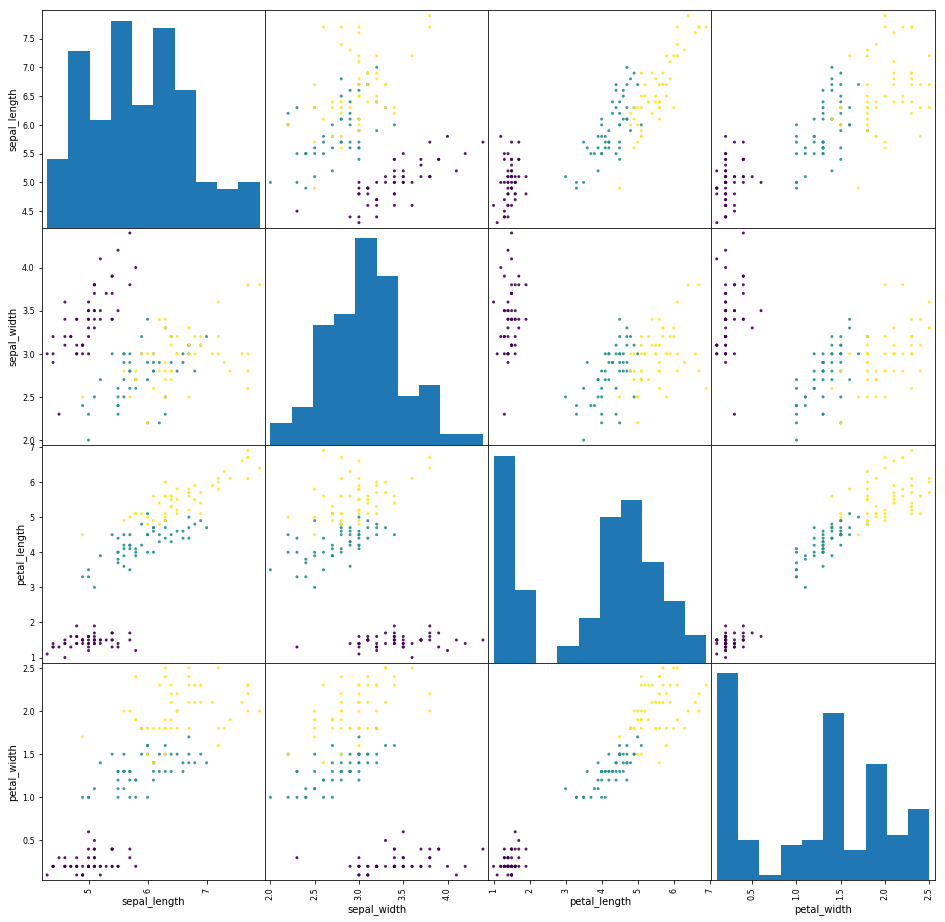

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, 
               alpha=0.9, 
               c=df.species.cat.codes, 
               figsize=(16,16))

plt.show()

These plots make us hopeful that the variation in the data will be able to predict the different species.  I like to start with box plots which graphically show the mean, median, quartiles, and outliers.

Only `sepal_width` has outliers, but they are not extremely extreme.

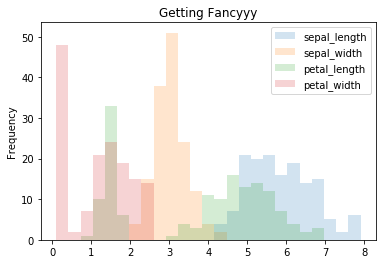

In [12]:
df.plot(bins=25, 
        alpha=0.2, 
        kind='hist',
        title='Getting Fancyyy')
plt.show()

The data seems to have good variation, but it looks like there might be a mass point around `0` for `petal_width`.  Let's look into that in more detail:

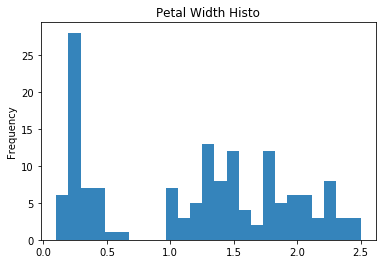

In [13]:
df.petal_width.plot(bins=25, 
                    alpha=0.9, 
                    kind='hist',
                    title='Petal Width Histo')
plt.show()

We might need to talk to a domain expert (biologist) about this. Or, it could be different species.

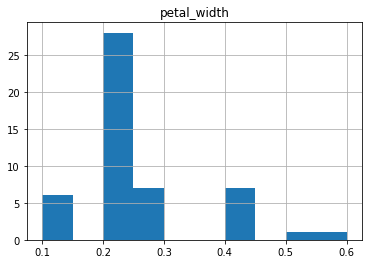

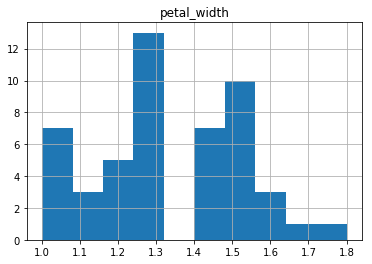

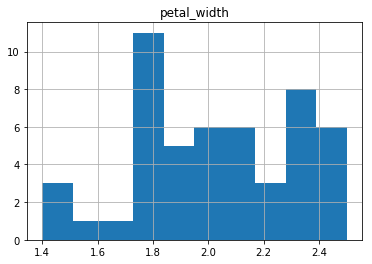

In [14]:
df.groupby('species').hist('petal_width', 
                           bins=10)
plt.show()

The split in the histogram of `petal_width` appears to be caused by the iris's species.

### Examine bad data

It is important to identify outliers and missing values, and then make a sensible decision about how to deal with them.

#### Outliers

We saw from the box plots that only `sepal_width` has outliers.  Some options are:

*  Drop them
*  Use them unchanged
*  Bin the continuous feature and add a bin for outliers (Check out `pd.cut` and `pd.get_dummies` for this case)
*  [Winsorize](https://en.wikipedia.org/wiki/Winsorising) the outliers
*  Truncate or impute the outliers in some other sensible manner
*  Check if some other factor is causing outliers, such as defects in telemetry/instrumentation

In the current case, using them unchanged is reasonable because the outliers are not very extreme.

#### Missing data

Similarly, you need to identify missing values and decide how to deal with them.  There are a couple options:

*  Drop rows with missing data if it is *missing at random* (How would you test this?)
*  Impute missing values
*  Bin the feature and add a bin for missing

### Clean data

Be very careful when cleaning data not to lose information which has predictive power.  It is very helpful to discuss cleaning and feature engineering with a domain expert.  Fortunately, this data doesn't need any further cleaning.  Often, you will have to identify and construct a label/target which makes sense and engineer other features.

Dates cause a host of problems which you may need to deal with.  First, convert all dates to a `datetime` object using `datetime.datetime.strptime()`.  This will make time-series plots and models work correctly.  Next, you may need to correct for the number of (working) days per month.  Also, day, week, month, and day of week effects are common: you may need to create dummy variables to handle these shocks.

## 4. Modeling

Now that the data is ready, we can start building a model.

### Build a crappy first model

Always start simply and build a first bad model. At this step, you want to check that your pipeline works and modeling is likely to succeed.  If the model performs too well, you should be suspicious of problems like information leakage.

## 5. Evaluation

Evaluate and refine your model.

## 6. Deployment

Deploy your model.

## Final remarks

EDA, cleaning, feature engineering, and modeling are an interative process.  At each step, you might discover something you missed and need to return to an earlier step.  Ultimately, understanding your data's strengths and weaknesses and engineering good features is usually more important that what model you choose.

Now, you should focus improving your model until you meet the metric for success which you identified during *Business Understanding* section of CRISP-DM